# Лекция №5. Введение в извлечение данных из интернета

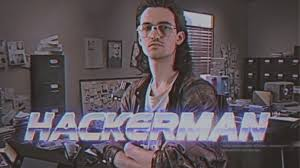

Содержание:

1. Библиотека requests & язык разметки HTML
2. BeautifulSoup
3. Бонусы

<br><br>

## 1. Библиотека requests & язык разметки HTML

In [1]:
import requests

In [10]:
response = requests.get('https://yandex.ru')

In [3]:
type(response)

requests.models.Response

In [11]:
response.status_code

200

In [5]:
type(response.text)

str

In [6]:
len(response.text)

176920

In [7]:
print(response.text[:1000])

<!DOCTYPE html><html class="i-ua_js_no i-ua_css_standart i-ua_browser_unknown i-ua_browser-engine_unknown i-ua_browser_desktop i-ua_platform_other" lang="ru"><head xmlns:og="http://ogp.me/ns#"><meta http-equiv=Content-Type content="text/html;charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><title>Яндекс</title><link rel="shortcut icon" href="//yastatic.net/iconostasis/_/8lFaTHLDzmsEZz-5XaQg9iTWZGE.png"><link rel="apple-touch-icon" href="//yastatic.net/iconostasis/_/5mdPq4V7ghRgzBvMkCaTzd2fjYg.png" sizes="76x76"><link rel="apple-touch-icon" href="//yastatic.net/iconostasis/_/s-hGoCQMUosTziuARBks08IUxmc.png" sizes="120x120"><link rel="apple-touch-icon" href="//yastatic.net/iconostasis/_/KnU823iWwj_vrPra7x9aQ-4yjRw.png" sizes="152x152"><link rel="apple-touch-icon" href="//yastatic.net/iconostasis/_/wT9gfGZZ80sP0VsoR6dgDyXJf2Y.png" sizes="180x180"><link rel="alternate" type="application/rss+xml" title="Новости Яндекса" href="https://yandex.ru/company/press_releases/news.

Теперь посмотрим на https://yandex.ru через режим разработчика.

Можно ли тут что-нибудь разобрать?

In [12]:
response.text.find('USD')

66048

In [9]:
k = response.text.find('USD')
response.text[k-200:k+400]

'm_id_2002 hint__item inline-stocks__part" data-precision="2"><a class="home-link home-link_black_yes inline-stocks__link" href="https://yandex.ru/news/quotes/2002.html" target="_blank" rel="noopener">USD</a><span class="inline-stocks__value"><span class="inline-stocks__text"><span class="inline-stocks__item__baloon b-inline"><i class="inline-stocks__item__baloon__tail"></i><span class="inline-stocks__item__baloon_inner">курс MOEX на 27/11</span></span></span><span class="inline-stocks__value_inner">75,89</span></span><td><span class="inline-stocks__cell inline-stocks__cell_type_delta inline-st'

Как-то сложновато.

<br><br><br><br>

На самом деле всё не так плохо, если разобраться с HTML

<br><br>

HTML состоит из элементов

 <tagname>Content goes here...</tagname> 

 <tagname1> <tagname2>Content goes here...</tagname2> </tagname1> 

У элементов могут быть атрибуты

 <tagname attribute='some_value_1' attribute2='some_value_2'>Content goes here...</tagname> 

Внутри элементов м.б. другие элементы

Шаблон HTML документа (любая страница имеет такую структуру

<!DOCTYPE html>
<html lang="en" dir="ltr">
  <head>
    <meta charset="utf-8">
    <title></title>
  </head>
  <body>
      <h1>sdagdkajsgdka</h1>
  </body>
</html>

Давайте посмотрим на http://example.com/

<br><br>
На основе этого шаблона можно простой текстовый файл превратить в простенькую веб-страничку

<br><br>

* [Туториал по HTML](https://www.w3schools.com/html/default.asp)

В принципе, подробно знать не обязательно. Главное - понимать, как устроен синтаксис, и запонмить несколько самых популярных тэгов:

* `<p>` - абзацы
* `<h1>`, ..., `<h6>` - заголовки разного размера
* `<a>` - ссылки
* `<table>`, `<tr>`, `<td>` - таблицы, строки таблиц, элементы таблиц
* `<img>` - картинки
* `<div>`, `<span>` - помогаю делить страницу на логические блоки
* ...

См. справочник 

* [Справочник элементов](https://www.w3schools.com/tags/default.asp)


Также полезно иметь представление о [CSS](https://www.w3schools.com/css/default.asp)

<br><br>

**Что знаем и умеем?**

* Умеем посылать GET-запросы с помощью `requests.get`
* Умеем проверять статус запроса с помощью `status_code`
* Умеем получать текст HTML-кода страницы
* Имеем общее представление о языке разметки HTML

<br><br>

## 2. BeautifulSoup: супчик, а не мешанина

In [15]:
from bs4 import BeautifulSoup

Чтобы установить выполняем прямо в ноутбке в отдельной ячейке вот эту команду:
    
* `!conda install -c anaconda beautifulsoup4 -y` (если у вас Anaconda)
* `!pip install beautifulsoup4 -y` (если у вас не Anaconda)

Либо эти же команды (но без восклицательного знака) в командной строке (Terminal, Anaconda Prompt, ...)

In [16]:
response = requests.get('https://yandex.ru')
print(response.status_code)

200


In [17]:
soup = BeautifulSoup(response.text)

In [18]:
type(soup)

bs4.BeautifulSoup

<br>

Методы `find` и `find_all`

In [19]:
result = soup.find('h1')

In [20]:
type(result)

bs4.element.Tag

In [21]:
result

<h1 class="news__tab-wrapper news__head-item"><a aria-controls="news_panel_news" aria-selected="true" class="home-link home-link_blue_yes news__tab news__tab_selected_yes mix-tabber__tab mix-tabber__tab_selected_yes" data-key="news" data-stat-link="news.tab.link.news" data-stat-select="news.tab.select.news" href="https://yandex.ru/news?mlid=1606546726_exp4.glob_225&amp;msid=1606547275.75869.94869.68360&amp;utm_medium=topnews_news&amp;utm_source=morda_desktop" id="news_tab_news" rel="noopener" role="tab" tabindex="0" target="_blank"><span class="news__tab-text">Сейчас в СМИ</span></a></h1>

In [22]:
result = soup.find_all('h1')

In [23]:
type(result)

bs4.element.ResultSet

In [24]:
type(result[0])

bs4.element.Tag

In [25]:
len(result)

14

In [28]:
result[0]

<h1 class="news__tab-wrapper news__head-item"><a aria-controls="news_panel_news" aria-selected="true" class="home-link home-link_blue_yes news__tab news__tab_selected_yes mix-tabber__tab mix-tabber__tab_selected_yes" data-key="news" data-stat-link="news.tab.link.news" data-stat-select="news.tab.select.news" href="https://yandex.ru/news?mlid=1606546726_exp4.glob_225&amp;msid=1606547275.75869.94869.68360&amp;utm_medium=topnews_news&amp;utm_source=morda_desktop" id="news_tab_news" rel="noopener" role="tab" tabindex="0" target="_blank"><span class="news__tab-text">Сейчас в СМИ</span></a></h1>

Методы `find` и `find_all` можно применять к результатам

In [33]:
soup.find('h1').find('a').find('span')

<span class="news__tab-text">Сейчас в СМИ</span>

In [36]:
# soup.find('span', attrs={'class': 'news__tab-text'})

In [ ]:
result[0].find_all('span')

In [37]:
result = soup.find_all('span', attrs={'class': 'inline-stocks__value_inner'})

Поиск по набору имён

In [44]:
result = soup.find_all(['h1', 'title'])

Поиск по значению атрибута

In [49]:
result = soup.find_all(attrs={'class': 'b-inline'})

In [53]:
# result[2]

Поиск по наличию атрибута

In [54]:
result = soup.find_all(attrs={'name': True})

<br><br>

 <tagname1> <tagname2>Content goes here...</tagname2> </tagname1> 

<!DOCTYPE html>
<html lang="en" dir="ltr">
  <head>
    <meta charset="utf-8">
    <title></title>
  </head>
  <body>
      <h1>sdagdkajsgdka</h1>
  </body>
</html>

In [83]:
result[3]

<input name="msid" type="hidden" value="1606547275.75869.94869.68360"/>

In [84]:
result[3].parent

<form action="https://yandex.ru/search/" aria-label="Поиск в интернете" class="search2 mini-suggest mini-suggest_search_yes mini-suggest_personal_yes mini-suggest_theme_flat mini-suggest_tab-change_yes mini-suggest_request_xhr mini-suggest_separate-popup_yes mini-suggest_autofocus_yes mini-suggest_re-request_yes mini-suggest_direct_yes mini-suggest_a11y_yes i-bem" data-bem='{"search2":{"nl":true}}' data-mini-bem='{"mini-suggest":{"url":"//yandex.ru/suggest/suggest-ya.cgi?srv=morda_ru_desktop&amp;wiz=TrWth&amp;uil=ru&amp;fact=1&amp;v=4&amp;icon=1&amp;lr=213&amp;hl=1&amp;bemjson=0&amp;history=1&amp;html=1&amp;platform=desktop&amp;rich_nav=1&amp;show_experiment=222&amp;show_experiment=224&amp;verified_nav=1&amp;rich_phone=1&amp;safeclick=1&amp;skip_clickdaemon_host=1&amp;yu=6076972331606547275&amp;maybe_ads=1","deleteUrl":"//yandex.ru/suggest-delete-text?srv=morda_ru_desktop&amp;text_to_delete=","counter":{"service":"morda_ru_desktop","url":"//yandex.ru/clck/jclck","timeout":300,"params":

In [85]:
result[3].parent.children

In [96]:
list(result[3].parent.children)[0]

<input name="lr" type="hidden" value="213"/>

In [98]:
list(result[3].parent.children)[1].previous_sibling

<input name="lr" type="hidden" value="213"/>

In [ ]:
list(list(result[3].parent.children)[1].previous_siblings)

In [100]:
list(result[3].parent.children)[1].next_sibling

<div class="search2__input"><span class="input input_size_ws-head input_theme_websearch input_search2-clear-hide_yes input_ahead_yes input_autofocus_capture input_keyboard_yes input_clear_yes i-bem" data-bem='{"input":{"live":false,"autoFocus":true}}'><span class="input__box"><span class="input__clear mini-suggest__input-clear" unselectable="on"> </span><div class="keyboard-loader input__keyboard-button i-bem b-opacity b-opacity-hold-ie keyboard-loader_lang_ru" data-bem='{"keyboard-loader":{"name":"keyboard-loader"}}'><i class="b-ico keyboard-loader__icon b-ico-kbd"></i></div><input aria-autocomplete="list" aria-label="Запрос" autocapitalize="off" autocomplete="off" autocorrect="off" class="input__control input__input mini-suggest__input" id="text" maxlength="400" name="text" spellcheck="false" tabindex="2"/></span></span></div>

In [99]:
list(list(result[3].parent.children)[1].next_siblings)

[<div class="search2__input"><span class="input input_size_ws-head input_theme_websearch input_search2-clear-hide_yes input_ahead_yes input_autofocus_capture input_keyboard_yes input_clear_yes i-bem" data-bem='{"input":{"live":false,"autoFocus":true}}'><span class="input__box"><span class="input__clear mini-suggest__input-clear" unselectable="on"> </span><div class="keyboard-loader input__keyboard-button i-bem b-opacity b-opacity-hold-ie keyboard-loader_lang_ru" data-bem='{"keyboard-loader":{"name":"keyboard-loader"}}'><i class="b-ico keyboard-loader__icon b-ico-kbd"></i></div><input aria-autocomplete="list" aria-label="Запрос" autocapitalize="off" autocomplete="off" autocorrect="off" class="input__control input__input mini-suggest__input" id="text" maxlength="400" name="text" spellcheck="false" tabindex="2"/></span></span></div>,
 <div class="search2__button"><button class="button mini-suggest__button button_theme_websearch button_size_ws-head i-bem" data-bem='{"button":{}}' role="but

In [ ]:
name, attrs, text, contents

In [101]:
result = soup.find_all('span', attrs={'class': 'inline-stocks__value_inner'})

In [102]:
result

[<span class="inline-stocks__value_inner">75,85</span>,
 <span class="inline-stocks__value_inner">90,74</span>,
 <span class="inline-stocks__value_inner">48,79</span>]

In [104]:
type(result[0])

bs4.element.Tag

In [105]:
result[0].name

'span'

In [106]:
result[0].attrs

{'class': ['inline-stocks__value_inner']}

In [107]:
result[0].attrs['class']

['inline-stocks__value_inner']

In [114]:
result[0]['class']

['inline-stocks__value_inner']

In [108]:
result[0].attrs.get('class')

['inline-stocks__value_inner']

In [109]:
result[0].text

'75,85'

In [110]:
result[0].contents

['75,85']

In [112]:
result[0].parent

<span class="inline-stocks__value"><span class="inline-stocks__text"><span class="inline-stocks__item__baloon b-inline"><i class="inline-stocks__item__baloon__tail"></i><span class="inline-stocks__item__baloon_inner">курс MOEX на 27/11</span></span></span><span class="inline-stocks__value_inner">75,85</span></span>

In [113]:
result[0].parent.contents

[<span class="inline-stocks__text"><span class="inline-stocks__item__baloon b-inline"><i class="inline-stocks__item__baloon__tail"></i><span class="inline-stocks__item__baloon_inner">курс MOEX на 27/11</span></span></span>,
 <span class="inline-stocks__value_inner">75,85</span>]

<br><br>
Поиск по самописной функции. Функция должна принимать на вход объект типа тэг, и возвращать истину или ложь. Найдуться все тэги, для которых функция вернёт `True`

In [125]:
def filter_function(tag):
    classes = tag.get('class')
    if not classes:
        return False
    return len(classes) > 6

In [126]:
results = soup.find_all(filter_function)

In [127]:
len(results)

26

In [129]:
results[0]['class']

['desk-notif-card',
 'desk-notif-card_covid_chart',
 'desk-notif-card_icon_no',
 'desk-notif-card_details_no',
 'desk-notif-card_actions_yes',
 'desk-notif-card_minified_yes',
 'desk-notif-card_animated_yes',
 'desk-notif-card_bg_default',
 'desk-notif-card_icon-align_left',
 'i-bem']

In [ ]:
results[1].attrs['class']

<br><br>

**Что знаем и умеем?**

* Знаем, для чего нужна библиотека `BeautifulSoup`
* Умеем устанавливать `BeautifulSoup`
* Умеем превращать текст исходного кода странички в объект типа `bs4.BeautifulSoup`
* Умеем находить нужные элементы на странице с помощью методов `find` и `find_all`
    * Понимаем разницу между `find` и `find_all`
    * Умеем находить элементы по имени/по наличию атрибута/по значению атрибута
    * Умеем находить элементы с помощью самописных функций
* Умеем перемещаться по дереву страницы: находить предков/наследников/соседей элементов страницы


Освоения этого материала достаточно для поиска любых элементов страницы. Тем не менее, рекомендую прочитать [документацию библиотеки](https://www.crummy.com/software/BeautifulSoup/bs4/doc/). Она короткая, но из неё можно узнать о дополнительных трюках, которые позволят упростить код.

<br><br>

## 3. Бонусы

#### 3.1 Качаем картинки

In [130]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Tunnel_View%2C_Yosemite_Valley%2C_Yosemite_NP_-_Diliff.jpg/173px-Tunnel_View%2C_Yosemite_Valley%2C_Yosemite_NP_-_Diliff.jpg'

In [131]:
response = requests.get(url)
print(response.status_code)

200


In [134]:
# response.content

In [136]:
with open('temp.jpg', 'wb') as f:
    f.write(response.content)

<br><br>

#### 3.2 Качаем файлы

https://www.gutenberg.org/

In [137]:
url = 'https://www.gutenberg.org/ebooks/63878.epub.noimages?session_id=d42c845826832f35ddc19b295afd8e0b0c04e069'

In [138]:
response = requests.get(url)
print(response.status_code)

200


In [139]:
with open('doc.epub', 'wb') as f:
    f.write(response.content)

Объёмные файлы лучше качать кусочками

In [ ]:
with requests.get(url, stream=True) as r:
    with open('hm.epub', 'wb') as f:
        r.raise_for_status()
        for chunk in r.iter_content(chunk_size=8192): 
            f.write(chunk)

<br><br>

#### 3.3 Selenium: парсим динамические странички

In [140]:
url = 'https://www.google.com/search?&q=birds'

In [141]:
response = requests.get(url)
print(response.status_code)

200


In [142]:
soup = BeautifulSoup(response.text)

In [143]:
results = soup.find_all('h3')

In [ ]:
results = soup.find_all('div', {'class': 'g'})

In [144]:
len(results)

10

In [154]:
results[9]

<h3 class="zBAuLc"><div class="BNeawe vvjwJb AP7Wnd">For Parents, Every Day Is Bird School - The New York Times</div></h3>

Чтобы установить выполняем прямо в ноутбке в отдельной ячейке вот эту команду:
    
* `!conda install -c conda-forge selenium -y` (если у вас Anaconda)
* `!pip install selenium -y` (если у вас не Anaconda)

Либо эти же команды (но без восклицательного знака) в командной строке (Terminal, Anaconda Prompt, ...)

Также необходим драйвер для имитации браузера. Скачать его можно

* [тут](https://selenium-python.readthedocs.io/installation.html)
* [или тут](https://www.selenium.dev/documentation/en/webdriver/driver_requirements/)

In [155]:
from selenium import webdriver

In [ ]:
?webdriver.Firefox

In [156]:
driver = webdriver.Firefox(executable_path='/Users/magnitofon/Downloads/geckodriver')

In [157]:
url = 'https://www.google.com/search?&q=birds'

In [158]:
driver.get(url)

In [159]:
soup = BeautifulSoup(driver.page_source)

In [160]:
results = soup.find_all('div', {'class': 'g'})

In [161]:
len(results)

9

In [162]:
for el in results:
    result = el.find('h3')
    if result:
        print(result.text)

Birds — самый высокий ресторан и клуб в мире
BIRDS 🦉 (@birds_354) • Instagram photos and videos
Bird - Wikipedia
Online bird guide, bird ID help, life history, bird sounds from ...
bird | Description, Species, Classification, Types, & Facts ...
Bird Pictures & Facts - National Geographic
Birds - National Geographic Kids


In [163]:
driver.close()

In [164]:
from selenium.webdriver.firefox.options import Options as FirefoxOptions
from selenium import webdriver

In [165]:
options = FirefoxOptions()
options.add_argument("--headless")

In [166]:
driver = webdriver.Firefox(options=options, executable_path='/Users/magnitofon/Downloads/geckodriver')

In [167]:
url = 'https://www.google.com/search?&q=birds'

In [168]:
driver.get(url)

In [169]:
soup = BeautifulSoup(driver.page_source)

In [170]:
results = soup.find_all('div', {'class': 'g'})

In [171]:
len(results)

9

In [172]:
driver.close()

<br><br>

#### 3.4 Пусть весь мир подождёт

Когда хотим отправить много запросов к одному серверу, лучше ставить паузу между запросами.

In [173]:
import time

In [174]:
print('Hello')
time.sleep(4)
print('Hello again')

Hello
Hello again


<br><br>

#### 3.5 Я не робот

In [175]:
url = 'https://duckduckgo.com/?q=hello&t=h_&ia=web'

In [176]:
response = requests.get(url)
print(response.status_code)

418


In [177]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:78.0) Gecko/20100101 Firefox/78.0'}

In [178]:
response = requests.get(url, headers=headers)
print(response.status_code)

200


<br><br>

#### 3.6 Не забываем про try-except

In [179]:
result = soup.find('h1').text

In [180]:
print(result)

Специальные ссылки


In [184]:
result = soup.find('h6').text

AttributeError: 'NoneType' object has no attribute 'text'

In [188]:
try:
    result = soup.find('h6').text
except:
    print('Running Exception')
    result = None

Running Exception


<br><br>

#### 3.7 Можно и так

In [189]:
from selenium.webdriver.common.action_chains import ActionChains

In [190]:
driver = webdriver.Firefox(executable_path='/Users/magnitofon/Downloads/geckodriver')
driver.get('https://jspaint.app')

In [191]:
element = driver.find_element_by_css_selector('canvas.main-canvas')

In [192]:
action_chain = ActionChains(driver)
action_chain.move_to_element(element)

action_chain.click_and_hold()
action_chain.move_by_offset(xoffset=0, yoffset=50)
action_chain.release()

action_chain.move_by_offset(xoffset=0, yoffset=-25)
action_chain.click_and_hold()
action_chain.move_by_offset(xoffset=20, yoffset=0)
action_chain.move_by_offset(xoffset=0, yoffset=-25)
action_chain.move_by_offset(xoffset=0, yoffset=50)
action_chain.release()


action_chain.move_by_offset(xoffset=20, yoffset=-50)
action_chain.click_and_hold()
action_chain.move_by_offset(xoffset=0, yoffset=50)
action_chain.release()

In [193]:
action_chain.perform()

In [194]:
driver.close()

Читайте [документацию](https://selenium-python.readthedocs.io/index.html)

<br><br>

**Что знаем и умеем?**

* Умеем качать файлы
* Знаем, как добавить паузы между запросами
* Знаем, как установить headers как у браузера
* Помним про `try-except`
* Можем получить HTML-код динамической страницы с помощью `Selenium`


**Хорошо бы**

* Заботать [регулярные выражения](https://docs.python.org/3.7/howto/regex.html#regex-howto) и основы [CSS](https://www.w3schools.com/css/) - так легче находить нужные элементы
* Разузнать подробнее про `GET` и `POST`-запросы. Научиться посылать `POST`-запросы с помощью `requests`
* Разузнать про `cookie` и как поодерживать юзер-сессию с помощью `requests`
* Узнать больше про Selenium
* Узнать, как посылать запросы асинхронно (см `asyncio` и `aiohttp`)
* Узнать, что такое API